<a href="https://colab.research.google.com/github/agungrizkysetiawan/PCVK-Ganjil_2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 50


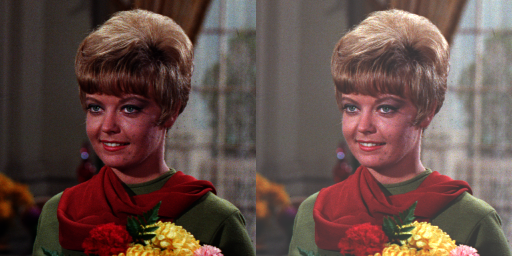

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tkinter import Frame

print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convrtScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM

1. Implement image inverse in your code using formula shown in the theoretical
background subsection above, giving the output shown in the following figure:

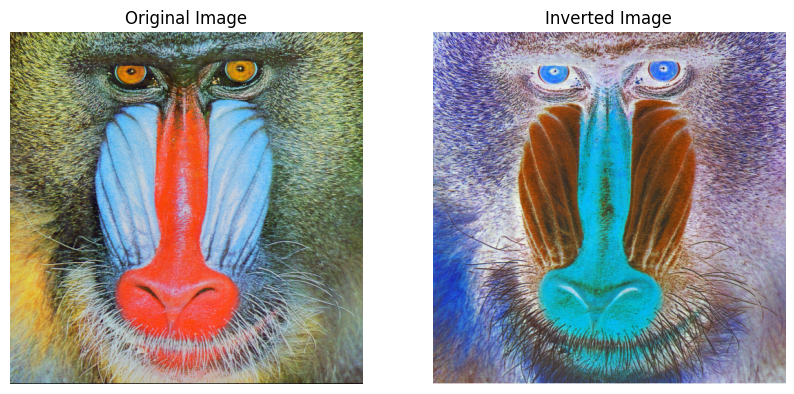

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image from the file path
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Convert the image to RGB (OpenCV uses BGR by default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Invert the colors
img_inverted = cv.bitwise_not(img_rgb)

# Display the original and the inverted image side by side using Matplotlib
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the inverted image
plt.subplot(1, 2, 2)
plt.imshow(img_inverted)
plt.title('Inverted Image')
plt.axis('off')

plt.show()


2. Implement contrast transformation in Google Collaboratory using the formula written
in the Theoretical background section, giving the output shown in the following figure:


Mengubah tingkat kecerahan dan kontras citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


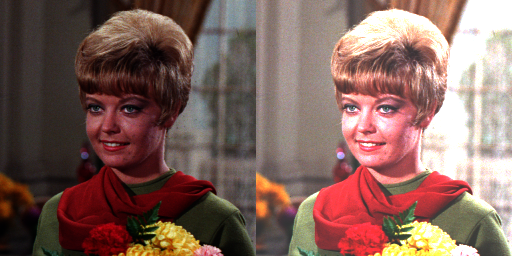

In [14]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan dan kontras citra')
print('--------------------------------')

# Input for brightness level
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
    print('Error, not a number')
    brightness = 0  # Default to 0 if input is not valid

# Input for contrast level
try:
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
    if contrast < 1.0 or contrast > 3.0:
        raise ValueError
except ValueError:
    print('Error, not a valid contrast value')
    contrast = 1.0  # Default to 1.0 if input is not valid

# Load the original image
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Apply brightness and contrast adjustment per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

# Alternative approach without the loop
# brightness_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Concatenate the original and adjusted images for comparison
final_frame = cv.hconcat([original, brightness_image])

# Display the final image
cv2_imshow(final_frame)

3. Implement transformation of logarithmic brightness on Google Colaboratory using the
formula written in the Theoretical Background Reviews, generating output shown in
the following figure:


Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------------------------------
Masukkan nilai kecerahan: 40


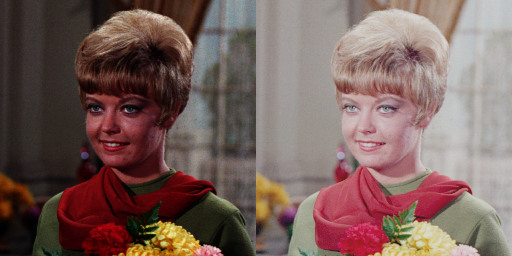

In [16]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

4. Implement grayscale transformation using the averaging, lightness, and luminance
method on Google Colaboratory using the formula written in the Theoretical
Background Reviews, generating output as follows :

a. Averaging


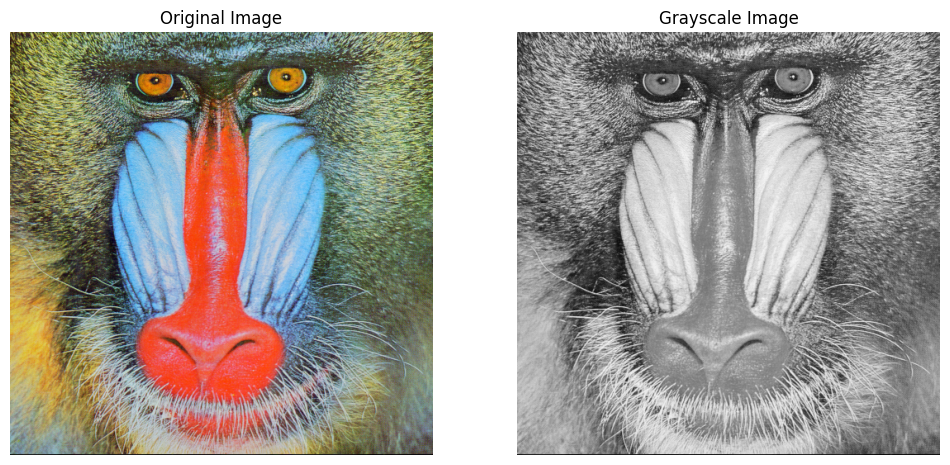

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Convert the image from BGR to RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Calculate the grayscale image by averaging the R, G, B channels
GrayAvg = np.mean(img_rgb, axis=-1).astype(np.uint8)

# Display the original image and the grayscale image side by side
f, axarr = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image
axarr[0].imshow(img_rgb)
axarr[0].set_title('Original Image')
axarr[0].axis('off')

# Show the grayscale image
axarr[1].imshow(GrayAvg, cmap='gray')
axarr[1].set_title('Grayscale Image')
axarr[1].axis('off')

plt.show()


b. Lightness

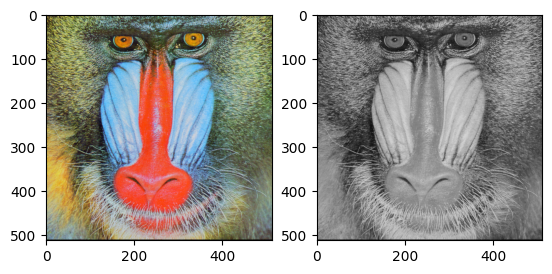

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_light = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)


c. Luminance

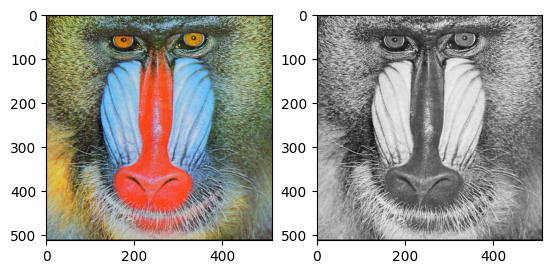

In [21]:
image_lum = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

5. Show certain colors in the image , and change other colors to grayscale. For example ,
show the blue color in the image input and change the parts other which is not colored
blue into grayscale as in the example below :


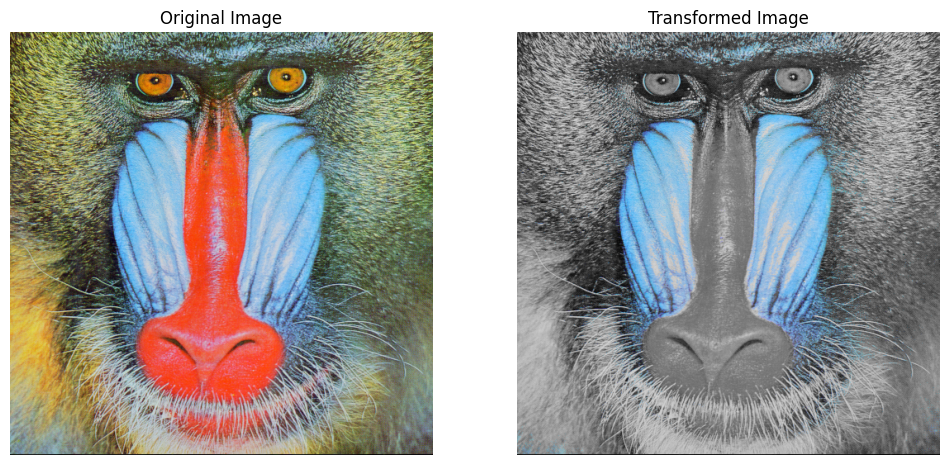

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Mengubah gambar dari BGR (OpenCV format) ke RGB (untuk matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi gambar ke HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Menentukan rentang warna biru (dalam HSV)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Membuat mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Membuat gambar grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Menggabungkan gambar grayscale dan area biru
# Di mana mask berwarna biru, tampilkan warna asli, di luar itu tampilkan grayscale
colored_part = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
gray_part = cv2.bitwise_and(gray, gray, mask=cv2.bitwise_not(mask))
gray_part_colored = cv2.cvtColor(gray_part, cv2.COLOR_GRAY2RGB)

# Gabungkan gambar berwarna dan grayscale
final_image = cv2.add(colored_part, gray_part_colored)

# Menampilkan hasil gambar asli dan gambar hasil transformasi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(final_image)
ax[1].set_title("Transformed Image")
ax[1].axis('off')

plt.show()
